In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [46]:
cld_df=pd.read_csv("calendar.csv")

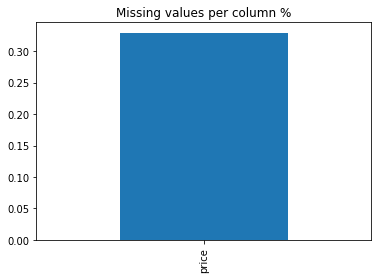

In [47]:
cld_missing_rate=cld_df.isnull().mean()
cld_nan_df=cld_missing_rate[cld_missing_rate>0]
cld_nan_df.plot.bar(title='Missing values per column %')

In [48]:
lst_df=pd.read_csv("listings.csv")

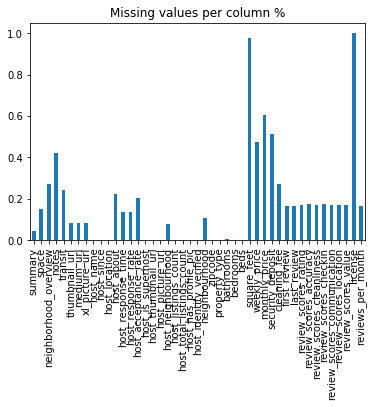

In [49]:
lst_missing_rate=lst_df.isnull().mean()
lst_nan_df=lst_missing_rate[lst_missing_rate>0]
lst_nan_df.plot.bar(title='Missing values per column %')

In [57]:
lst_df=lst_df.rename(columns={"id":"listing_id"})
df=pd.merge(cld_df,lst_df,on='listing_id')
df.head()

,listing_id,date,available,price_x,listing_url,scrape_id,last_scraped,name,summary,space,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,241032,2016-01-05,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,241032,2016-01-06,f,NaN,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
3,241032,2016-01-07,f,NaN,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
4,241032,2016-01-08,f,NaN,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [58]:
#drop columns that hava high missing rate and not correlated with the price 
columns_to_drop=['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'calculated_host_listings_count','weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_verifications','host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']
df.drop(columns_to_drop,axis=1,inplace=True)

In [59]:
def get_month(date):
    '''get the month of a date'''
    return int(date.split('-')[1])
df['month']=df['date'].apply(get_month)

def get_year(date):
    '''get the year of a date'''
    return int(date.split('-')[0])
df['year']=df['date'].apply(get_year)
df.drop('date',axis=1,inplace=True)

In [60]:
#transfrom the price_x(currency format) into float
df.dropna(subset=['price_x'],inplace=True)
df['price']=df['price_x'].astype(str)
df['price']=df['price'].apply(lambda x:x.replace("$", ""))
df['price']=df['price'].apply(lambda x:x.replace(",", ""))
df['price']=df['price'].astype('float64') 
df.drop('price_x',axis=1,inplace=True)
df

,listing_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,month,year,price
0,241032,2011-08-11,within a few hours,96%,f,3.0,t,t,Queen Anne,Apartment,...,10.0,9.0,10.0,f,moderate,f,f,1,2016,85.0
1,241032,2011-08-11,within a few hours,96%,f,3.0,t,t,Queen Anne,Apartment,...,10.0,9.0,10.0,f,moderate,f,f,1,2016,85.0
9,241032,2011-08-11,within a few hours,96%,f,3.0,t,t,Queen Anne,Apartment,...,10.0,9.0,10.0,f,moderate,f,f,1,2016,85.0
10,241032,2011-08-11,within a few hours,96%,f,3.0,t,t,Queen Anne,Apartment,...,10.0,9.0,10.0,f,moderate,f,f,1,2016,85.0
14,241032,2011-08-11,within a few hours,96%,f,3.0,t,t,Queen Anne,Apartment,...,10.0,9.0,10.0,f,moderate,f,f,1,2016,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393207,10208623,2014-04-25,within a day,100%,f,1.0,t,t,Queen Anne,Apartment,...,NaN,NaN,NaN,f,flexible,f,f,1,2016,87.0
1393208,10208623,2014-04-25,within a day,100%,f,1.0,t,t,Queen Anne,Apartment,...,NaN,NaN,NaN,f,flexible,f,f,1,2016,87.0
1393211,10208623,2014-04-25,within a day,100%,f,1.0,t,t,Queen Anne,Apartment,...,NaN,NaN,NaN,f,flexible,f,f,1,2016,87.0
1393212,10208623,2014-04-25,within a day,100%,f,1.0,t,t,Queen Anne,Apartment,...,NaN,NaN,NaN,f,flexible,f,f,1,2016,87.0


In [61]:
def get_host_year(date):
    '''get the year of host since column, retuen NaN if the value is missing'''
    try:
        return int(date.split('-')[0])
    except:
        return np.nan
df['host_year']=df['host_since'].apply(get_host_year)
df['host_year'].fillna(df['host_year'].mean(),inplace=True)
df.drop('host_since',axis=1, inplace=True)

In [62]:
#transform host_response_rate(percentage) to float and fill in the missing data with mean
df['host_response_rate']=df['host_response_rate'].astype(str)
df['host_response_rate']=df['host_response_rate'].apply(lambda x:x.replace('%','')).astype(float)
df['host_response_rate'].fillna(df['host_response_rate'].mean(),inplace=True)

In [63]:
def get_extra_people(fee):
    '''return 1 if charge fee for extra people, return 0 if no extra fee charged'''
    if fee=='$0.00':
        return 0.0
    else:
        return 1.0
df['extra_people']=df['extra_people'].apply(get_extra_people)

In [64]:
#fill in the missing data with mode because number of bedrooms/bathrooms/beds need to be integer
df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms']=df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds']=df['beds'].fillna(df['beds'].mode()[0])

In [65]:
#fill in the missing data with mean value
df['host_listings_count'].fillna(df['host_listings_count'].mean(),inplace=True)
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(),inplace=True)
df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].mean(),inplace=True)
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].mean(),inplace=True)
df['review_scores_checkin'].fillna(df['review_scores_checkin'].mean(),inplace=True)
df['review_scores_communication'].fillna(df['review_scores_communication'].mean(),inplace=True)
df['review_scores_location'].fillna(df['review_scores_location'].mean(),inplace=True)
df['review_scores_value'].fillna(df['review_scores_value'].mean(),inplace=True)
df

,listing_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,...,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,month,year,price,host_year
0,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,9.000000,10.000000,f,moderate,f,f,1,2016,85.0,2011.0
1,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,9.000000,10.000000,f,moderate,f,f,1,2016,85.0,2011.0
9,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,9.000000,10.000000,f,moderate,f,f,1,2016,85.0,2011.0
10,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,9.000000,10.000000,f,moderate,f,f,1,2016,85.0,2011.0
14,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,9.000000,10.000000,f,moderate,f,f,1,2016,85.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393207,10208623,within a day,100.0,f,1.0,t,t,Queen Anne,Apartment,Entire home/apt,...,9.598126,9.427747,f,flexible,f,f,1,2016,87.0,2014.0
1393208,10208623,within a day,100.0,f,1.0,t,t,Queen Anne,Apartment,Entire home/apt,...,9.598126,9.427747,f,flexible,f,f,1,2016,87.0,2014.0
1393211,10208623,within a day,100.0,f,1.0,t,t,Queen Anne,Apartment,Entire home/apt,...,9.598126,9.427747,f,flexible,f,f,1,2016,87.0,2014.0
1393212,10208623,within a day,100.0,f,1.0,t,t,Queen Anne,Apartment,Entire home/apt,...,9.598126,9.427747,f,flexible,f,f,1,2016,87.0,2014.0


In [66]:
def get_val(row,column_name,value):
    '''return 1 if the list value of 'amenities' include one of the top 10 frequently used amenities, return 0 if not'''
    vals=row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
    if value in vals:
        return 1
    else:
        return 0
def split_list(df, column_name, max_dummies_num = 10):
    '''get dictionary of unique values in lists across dataset rows and sort to get top 10 most common amenities'''
    values_dict = {}
    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val(row, column_name, value[0]),axis=1)    
    return
split_list(df,'amenities')
df.drop('amenities',axis=1,inplace=True)
df

,listing_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,...,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV
0,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,1,1,1,0,0,1,1,1,0,1
1,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,1,1,1,0,0,1,1,1,0,1
9,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,1,1,1,0,0,1,1,1,0,1
10,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,1,1,1,0,0,1,1,1,0,1
14,241032,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,1,1,1,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393207,10208623,within a day,100.0,f,1.0,t,t,Queen Anne,Apartment,Entire home/apt,...,1,1,1,1,1,1,1,1,1,1
1393208,10208623,within a day,100.0,f,1.0,t,t,Queen Anne,Apartment,Entire home/apt,...,1,1,1,1,1,1,1,1,1,1
1393211,10208623,within a day,100.0,f,1.0,t,t,Queen Anne,Apartment,Entire home/apt,...,1,1,1,1,1,1,1,1,1,1
1393212,10208623,within a day,100.0,f,1.0,t,t,Queen Anne,Apartment,Entire home/apt,...,1,1,1,1,1,1,1,1,1,1


In [19]:
df.columns[df.isnull().mean()>0]

Index(['host_response_time', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'property_type'],
      dtype='object')

# Question 1:What is the impact of month on the listing's availability?

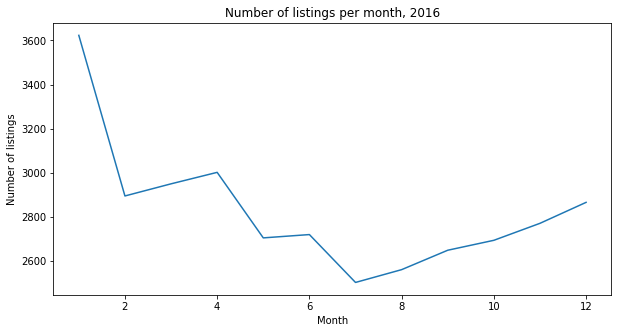

In [67]:
number_of_listings_by_month = []
for i in range(12):
    number_of_listings_by_month.append(len(df[df['month'] == i+1]['listing_id'].unique()))

#plot
x=np.arange(1,13,step=1)
y=number_of_listings_by_month
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')
plt.show()

# Question 2: Are there any specific areas that tend to have higher prices?

In [68]:
neighbourhood=df['neighbourhood_group_cleansed'].unique()
neighbourhood

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [69]:
nb_df=df.groupby(['month','neighbourhood_group_cleansed']).mean().reset_index()
nb_df

,month,neighbourhood_group_cleansed,listing_id,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,...,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV
0,1,Ballard,5.090027e+06,95.557536,6.017945,3.328439,1.221316,1.329255,1.806417,1.749048,...,0.970908,0.979880,0.843937,0.903480,0.877379,0.707178,0.700109,0.705275,0.771343,0.675095
1,1,Beacon Hill,4.799768e+06,95.017548,3.385782,3.018957,1.218246,1.242180,1.682464,1.428910,...,0.962085,0.942654,0.778199,0.839810,0.644076,0.779147,0.779147,0.748815,0.626066,0.615640
2,1,Capitol Hill,5.619135e+06,94.553847,5.743551,2.898435,1.255478,1.116892,1.492822,1.511279,...,0.924879,0.934593,0.895521,0.793632,0.828494,0.732650,0.733081,0.773233,0.674690,0.646087
3,1,Cascade,5.692750e+06,89.918250,2.671031,2.973813,1.195581,1.146481,1.572013,1.583470,...,0.973813,0.905892,0.959083,0.745499,0.797054,0.815057,0.787234,0.614566,0.510638,0.630115
4,1,Central Area,5.612709e+06,92.900061,2.152580,3.466565,1.357264,1.365071,1.772573,1.804820,...,0.940428,0.942804,0.859131,0.857094,0.835031,0.749830,0.757128,0.703836,0.673116,0.651901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,12,Queen Anne,5.839996e+06,94.595961,1.975493,3.431265,1.325044,1.426044,1.796549,1.748115,...,0.965777,0.955046,0.874130,0.844403,0.842662,0.786108,0.786108,0.709542,0.727523,0.772477
200,12,Rainier Valley,5.090303e+06,95.892693,5.048517,3.115609,1.224979,1.308567,1.622678,1.696146,...,0.991406,0.965622,0.871084,0.910175,0.824231,0.707790,0.707790,0.673413,0.669531,0.605489
201,12,Seward Park,4.637901e+06,91.327958,1.179894,4.096296,1.311111,1.408466,2.211640,1.721693,...,1.000000,1.000000,0.770370,0.770370,0.737566,0.737566,0.704762,0.737566,0.671958,0.573545
202,12,University District,6.306296e+06,91.038647,15.451692,3.062783,1.151378,1.132194,1.702825,1.519009,...,0.989187,0.967562,0.949076,0.840251,0.881060,0.775375,0.778514,0.765260,0.702825,0.526683


Text(0.5, 1.0, 'Average price for neighbourhood, $')

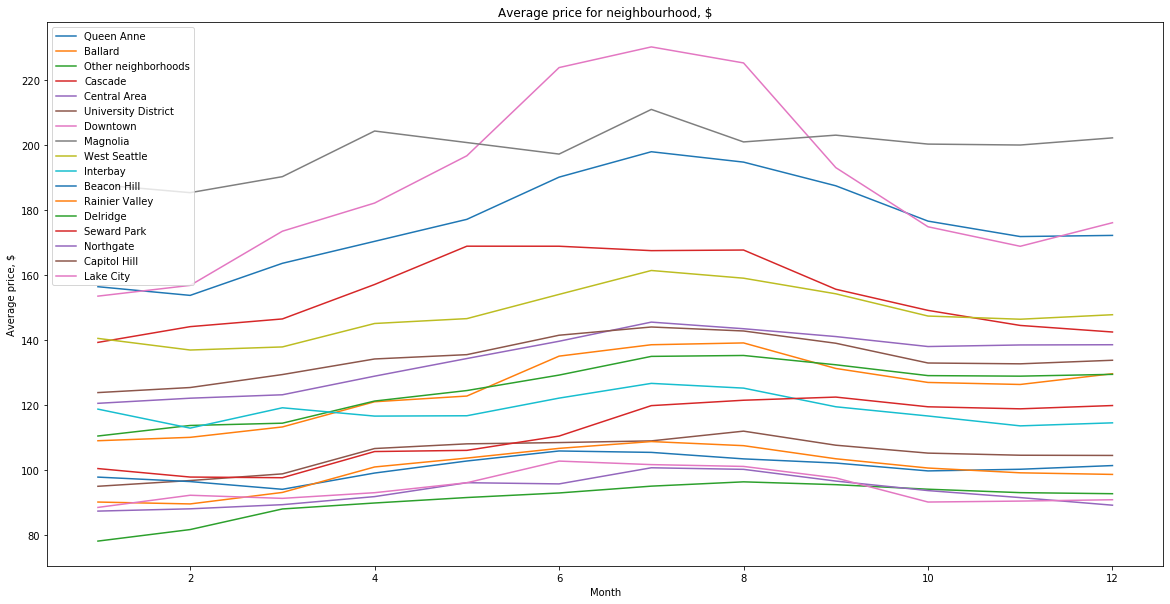

In [70]:
x=np.arange(1,13,step=1)
plt.figure(figsize=(20,10))
for i in neighbourhood:
    y=nb_df[nb_df['neighbourhood_group_cleansed']==i]['price']
    plt.plot(x,y)
plt.legend(neighbourhood,loc='best')
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price for neighbourhood, $')

# Modeling

In [71]:
#turn categorical columns into dummies
df=pd.get_dummies(df,drop_first=True,dummy_na=True)
df

,listing_id,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,...,bed_type_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,241032,96.0,3.0,4,1.0,1.0,1.0,2,1.0,1,...,0,0,0,1,0,0,0,0,0,0
1,241032,96.0,3.0,4,1.0,1.0,1.0,2,1.0,1,...,0,0,0,1,0,0,0,0,0,0
9,241032,96.0,3.0,4,1.0,1.0,1.0,2,1.0,1,...,0,0,0,1,0,0,0,0,0,0
10,241032,96.0,3.0,4,1.0,1.0,1.0,2,1.0,1,...,0,0,0,1,0,0,0,0,0,0
14,241032,96.0,3.0,4,1.0,1.0,1.0,2,1.0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393207,10208623,100.0,1.0,3,1.5,2.0,1.0,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1393208,10208623,100.0,1.0,3,1.5,2.0,1.0,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1393211,10208623,100.0,1.0,3,1.5,2.0,1.0,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1393212,10208623,100.0,1.0,3,1.5,2.0,1.0,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#listing_id and year(constant) has nothing to do with the price
df.drop(['listing_id','year'],axis=1,inplace=True)

In [79]:
#build a predictive random forest classifier
X = df.drop(columns = 'price')
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

/Users/yaxinwan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
#calculate scores for the model
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print('Random Forest MSE train:',mean_squared_error(y_train, y_train_pred), 'test:',mean_squared_error(y_test, y_test_pred))

Random Forest MSE train: 187.39631451222957 test: 210.94264146732496


In [80]:
#Calculate feature importances
headers = ["name", "score"]
values = sorted(zip(X_train.columns, RF.feature_importances_), key=lambda x: x[1] * -1)
RF_feature_importances = pd.DataFrame(values, columns = headers)
RF_feature_importances = RF_feature_importances.sort_values(by = ['score'], ascending = False)
RF_feature_importances

,name,score
0,bedrooms,0.381615
1,bathrooms,0.144928
2,month,0.039335
3,accommodates,0.036544
4,room_type_Private room,0.029297
...,...,...
85,bed_type_nan,0.000000
86,instant_bookable_nan,0.000000
87,cancellation_policy_nan,0.000000
88,require_guest_profile_picture_nan,0.000000


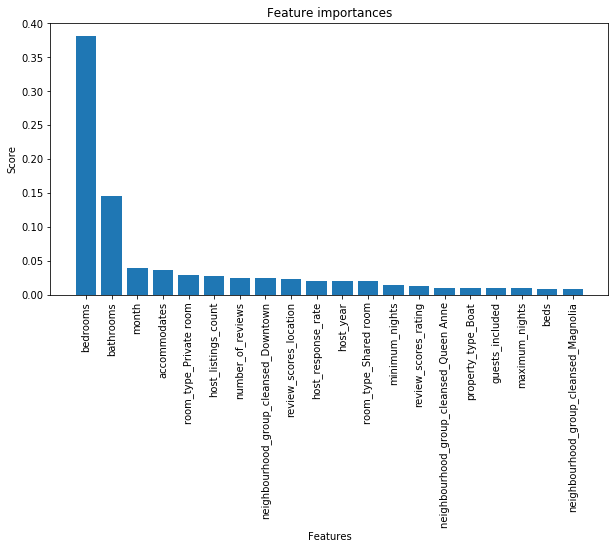

In [81]:
#plot feature importances
features = RF_feature_importances['name'][:20]
x_loc= np.arange(len(features))
scores = RF_feature_importances['score'][:20]

plt.figure(figsize=(10,5))
plt.bar(x_loc, scores)
plt.xticks(x_loc, features,rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances')
plt.savefig('feature importances RF.png') 
plt.show()